In [1]:
from composer.utils.object_store import ObjectStoreProviderHparams
from lth_diet.exps import LotteryExperiment
from lth_diet.utils import utils
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
from tqdm import tqdm
plt.style.use("default")
rc = {"figure.figsize": (4, 3), "figure.dpi": 150, "figure.constrained_layout.use": True, "axes.grid": True, 
      "axes.spines.right": False, "axes.spines.top": False, "axes.linewidth": 0.6, "grid.linewidth": 0.6,
      "xtick.major.width": 0.6, "ytick.major.width": 0.6, "xtick.major.size": 4, "ytick.major.size": 4, 
      "axes.labelsize": 14, "axes.titlesize": 14, "xtick.labelsize": 12, "ytick.labelsize": 12,
      "axes.titlepad": 4, "axes.labelpad": 2, "xtick.major.pad": 2, "ytick.major.pad": 2,
      "lines.linewidth": 1.2, "patch.linewidth": 0}
sns.set_theme(style='ticks', palette=sns.color_palette("colorblind"), rc=rc)
object_store = ObjectStoreProviderHparams('google_storage', 'prunes', 'GCS_KEY').initialize_object()
bucket_dir = 'open_lth_data'

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
def get_accuracy_val_from_hash(exp_hash, num_reps, object_store, num_levels):
    #exp_hash = utils.get_hash(exp.name)
    accs = np.zeros((num_reps, num_levels+1))
    for rep in range(num_reps):
        acc_level = []
        for level in range(num_levels+1):       
            object_store.download_object(
                f"{bucket_dir}/{exp_hash}/replicate_{rep+1}/level_{level}/main/logger", "temp"
            )
            df = pd.read_csv("temp", header=None)
            acc_level.append(df[2].iloc[-2])
            os.remove("temp")
        accs[rep, :] = acc_level
    return accs

In [18]:
accs_rt = get_accuracy_val_from_hash('lottery_93bc65d66dfa64ffaf2a0ab105433a2c', 4, object_store, 20)

In [19]:
print(accs_rt)

[[0.9126 0.9111 0.9111 0.9035 0.9027 0.8973 0.8953 0.889  0.8848 0.8811
  0.8715 0.862  0.8513 0.8448 0.8336 0.8134 0.8098 0.7878 0.7746 0.7523
  0.7412]
 [0.9177 0.9114 0.9076 0.9044 0.9002 0.8943 0.8926 0.8941 0.8844 0.8769
  0.8731 0.863  0.8524 0.8431 0.8328 0.8235 0.8012 0.7925 0.7779 0.7552
  0.72  ]
 [0.9134 0.9121 0.9091 0.9055 0.9037 0.9024 0.8937 0.8899 0.8853 0.8787
  0.87   0.8651 0.8565 0.8438 0.833  0.8262 0.8082 0.7923 0.7805 0.7579
  0.7114]
 [0.9177 0.9144 0.9109 0.9076 0.9013 0.897  0.894  0.8885 0.8854 0.875
  0.872  0.8637 0.8563 0.8383 0.8309 0.8225 0.8032 0.7913 0.7713 0.7312
  0.7131]]


In [10]:
exps_hash_all = {
    0:   'lottery_331b0df3a2e5fe1152d0833c205bf0ce', 
    400: 'lottery_885d0c007778485fd7dbb02762bbbdd9',
    800: 'lottery_52ca7fa2fd4d90921b2172043ecc550b',
}
exps_hash_rand = {
    256:  'lottery_15a8b3592f3b4f96875f976efc1861ba',
    512:  'lottery_6c1cd9d70d6805dc7bc61864a05c4911',
    1024: 'lottery_f0871ecf1b2f859179032ded9e21edb7',
    2048: 'lottery_38faf1033a261ef319e89251879c580b',
    3200: 'lottery_442e7546dd44240465b55b0783bdb5e3',
    6400: 'lottery_ca0fca68956ec8882599f8bdc5ae9e3d',
}
exps_hash_easy = {
    256:  'lottery_8a4c15c8cb811ed9db5856dcdbef1467',
    512:  'lottery_9bacca70e37d89b85103437fe02edd83',
    1024: 'lottery_49bccb4e10f87533b2ab9170446c4b4a',
    2048: 'lottery_e70cfec8d2105aaed1a33cb80de2a3be',
    3200: 'lottery_c387a3986e0ee799b9bf7a62ca52550a',
    6400: 'lottery_6fd0a97bfa45c29daf96c9c965eca62d',
}
exps_hash_hard = {
    256:  'lottery_4f94cef09dda48e2371cb66b9096689e',
    512:  'lottery_eeca8203aaed90495c658e9d812d1cfe',
    1024: 'lottery_6c87f0819e2e0d0a7f1bc9b75ec5788b',
    2048: 'lottery_6c5602d08904071deeda96aaaca7f872',
    3200: 'lottery_e3c96195c7517ae835eb91f5248ed44c',
    6400: 'lottery_d4be480d40bd7a2b44833f8d0b711e69',
}

In [3]:
baseline_rewind = [0, 400, 800]
subset_sizes = [256, 512, 1024, 2048, 3200, 6400]
levels = 20
num_reps = 4

In [6]:
accs_easy_list = []
for size in  tqdm(subset_sizes):
    accs_temp = get_accuracy_val_from_hash(exps_hash_easy[size], 4, object_store, 20)
    accs_easy_list.append(accs_temp)
accs_easy = np.array(accs_easy_list)

100%|██████████| 6/6 [05:49<00:00, 58.23s/it]


In [8]:

accs_rand_list = []
for size in  tqdm(subset_sizes):
    accs_temp = get_accuracy_val_from_hash(exps_hash_rand[size], 4, object_store, 20)
    accs_rand_list.append(accs_temp)
accs_rand = np.array(accs_rand_list)

100%|██████████| 6/6 [04:41<00:00, 46.90s/it]


In [12]:
accs_hard_list = []
for size in  tqdm(subset_sizes):
    accs_temp = get_accuracy_val_from_hash(exps_hash_hard[size], 4, object_store, 20)
    accs_hard_list.append(accs_temp)
accs_hard = np.array(accs_hard_list)

100%|██████████| 6/6 [04:21<00:00, 43.55s/it]


In [16]:
accs_all_list = []
for r in  tqdm(baseline_rewind):
    accs_temp = get_accuracy_val_from_hash(exps_hash_all[r], 4, object_store, 20)
    accs_all_list.append(accs_temp)
accs_all = np.array(accs_all_list)

100%|██████████| 3/3 [02:06<00:00, 42.33s/it]


In [17]:
print(accs_easy.shape)
print(accs_rand.shape)
print(accs_hard.shape)
print(accs_all.shape)

(6, 4, 21)
(6, 4, 21)
(6, 4, 21)
(3, 4, 21)


In [ ]:
np.savez('data/cifar100_results', 
    accs_all = accs_all, 
    accs_easy = accs_easy, 
    accs_hard = accs_hard, 
    accs_rand = accs_rand,
)

In [5]:
accs = np.load('data/cifar100_results.npz')
accs_all = accs['accs_all']
accs_rand = accs['accs_rand']
accs_easy = accs['accs_easy']
accs_hard = accs['accs_hard']

### Plot for 200 batches

0.6791


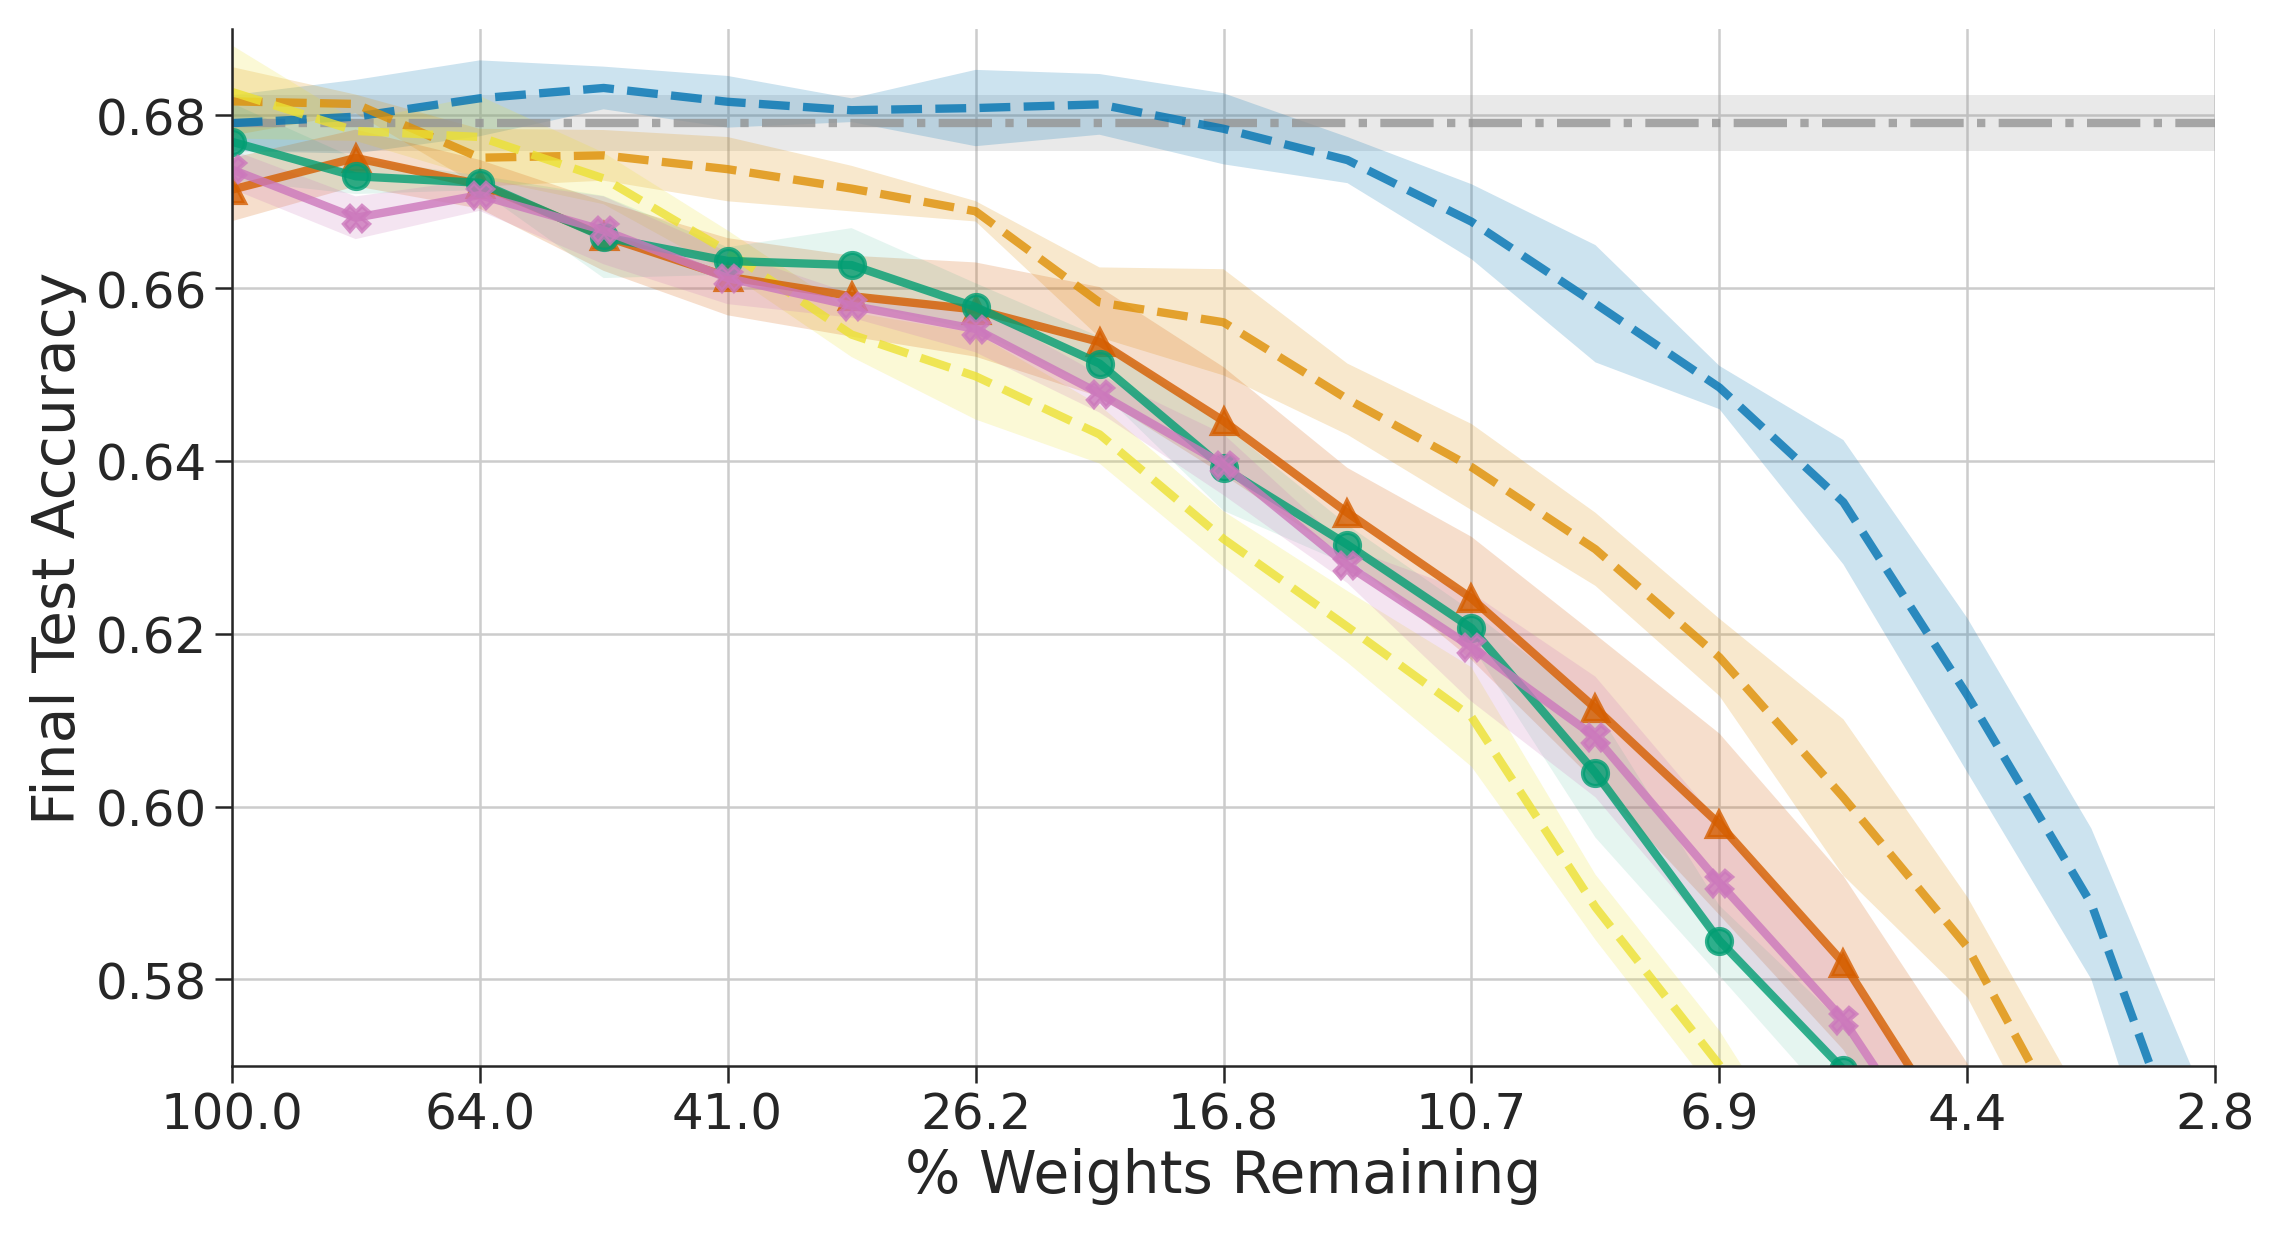

0.6791


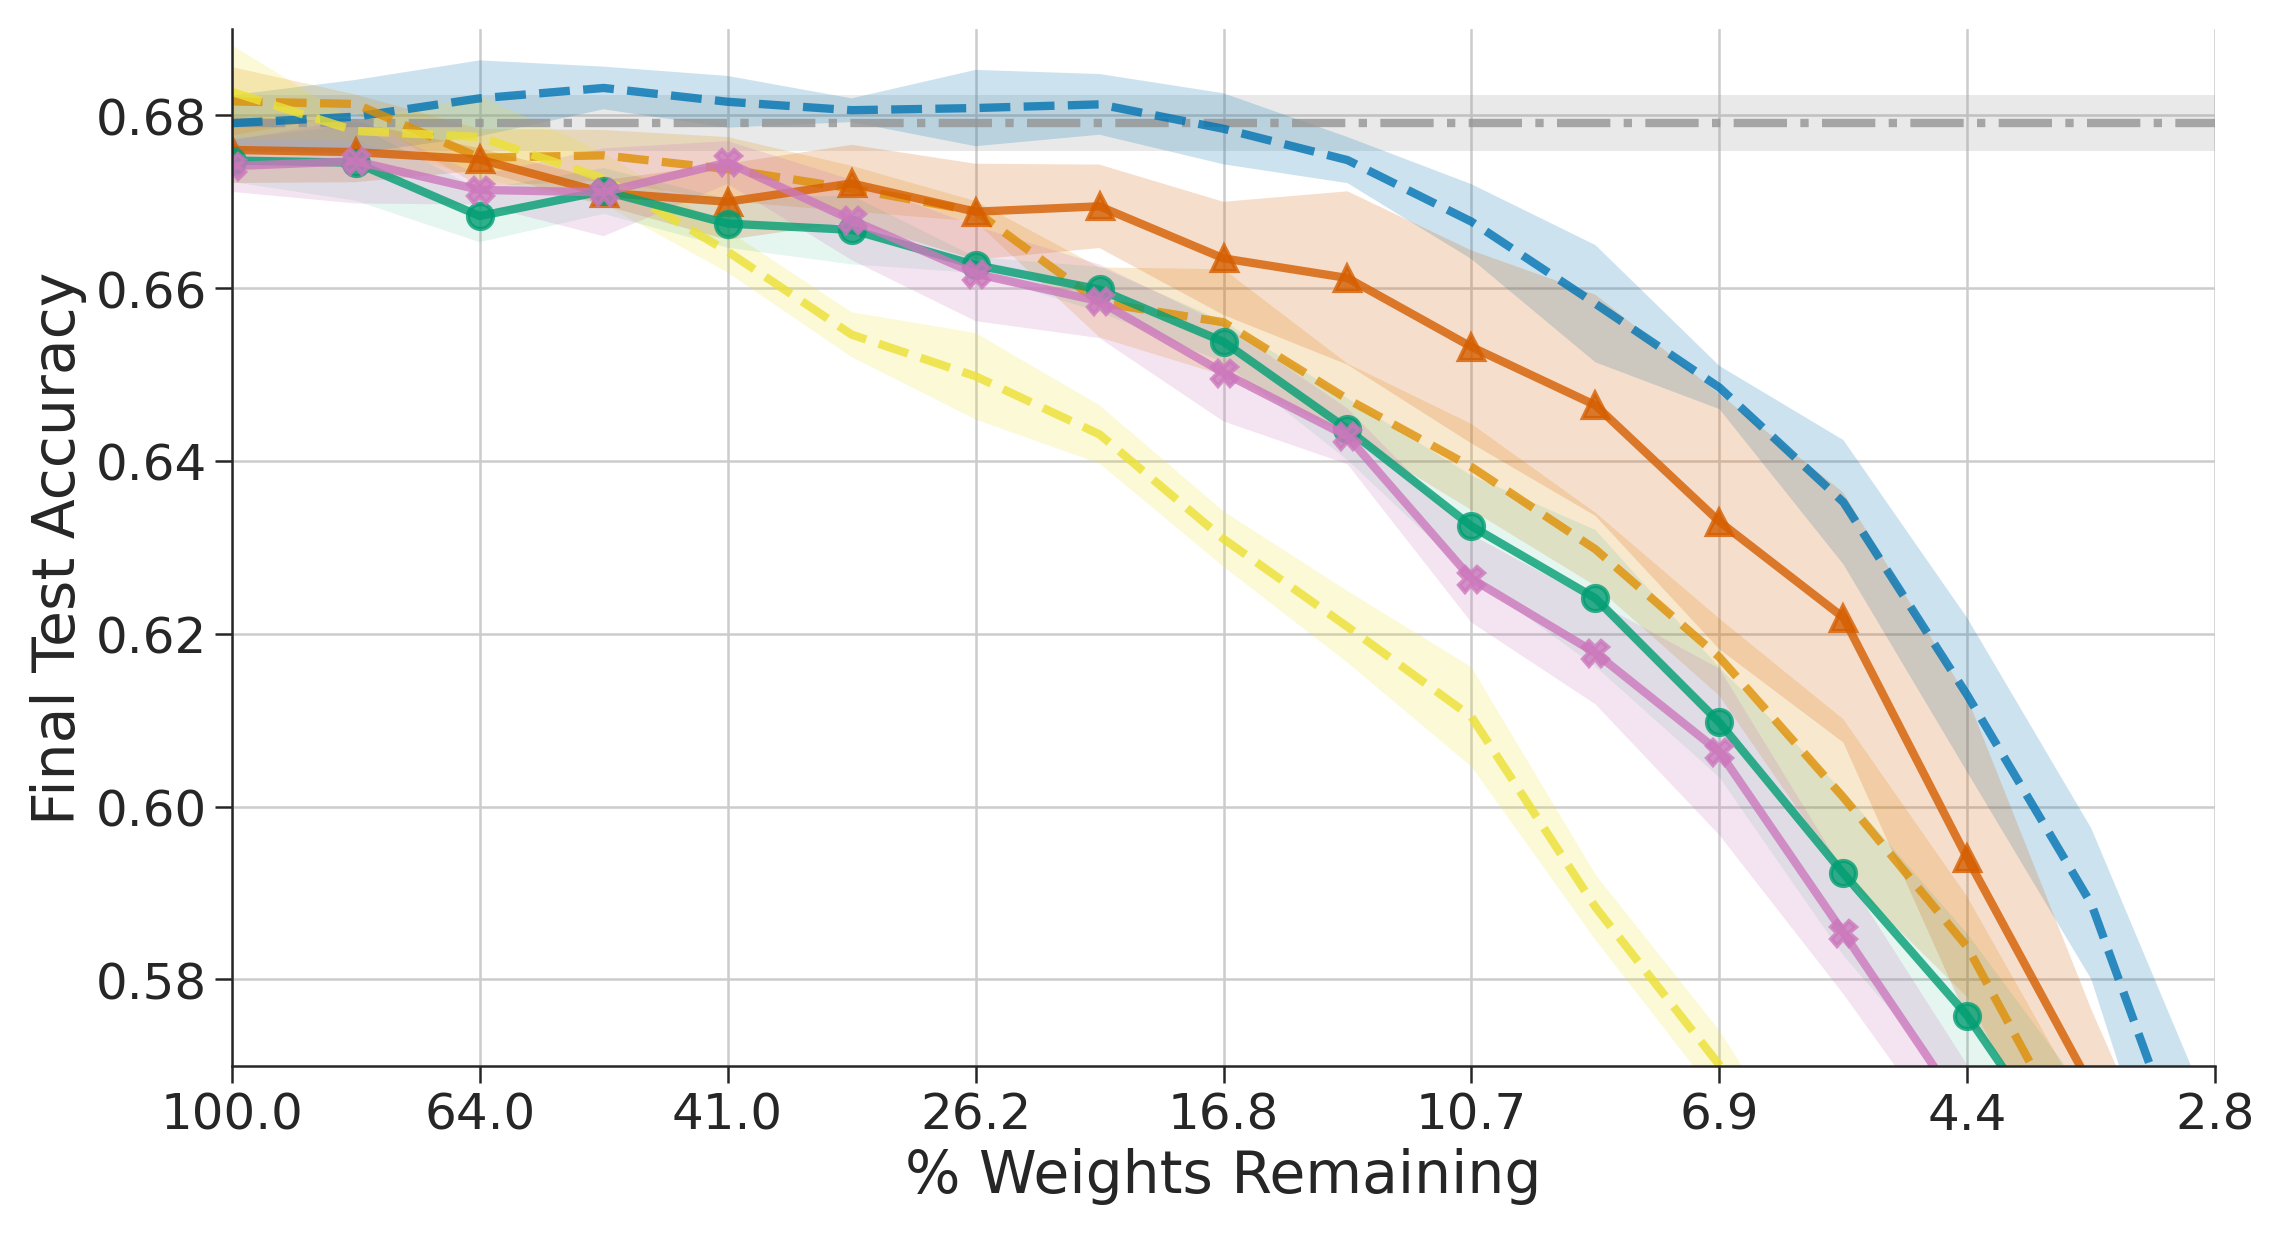

0.6791


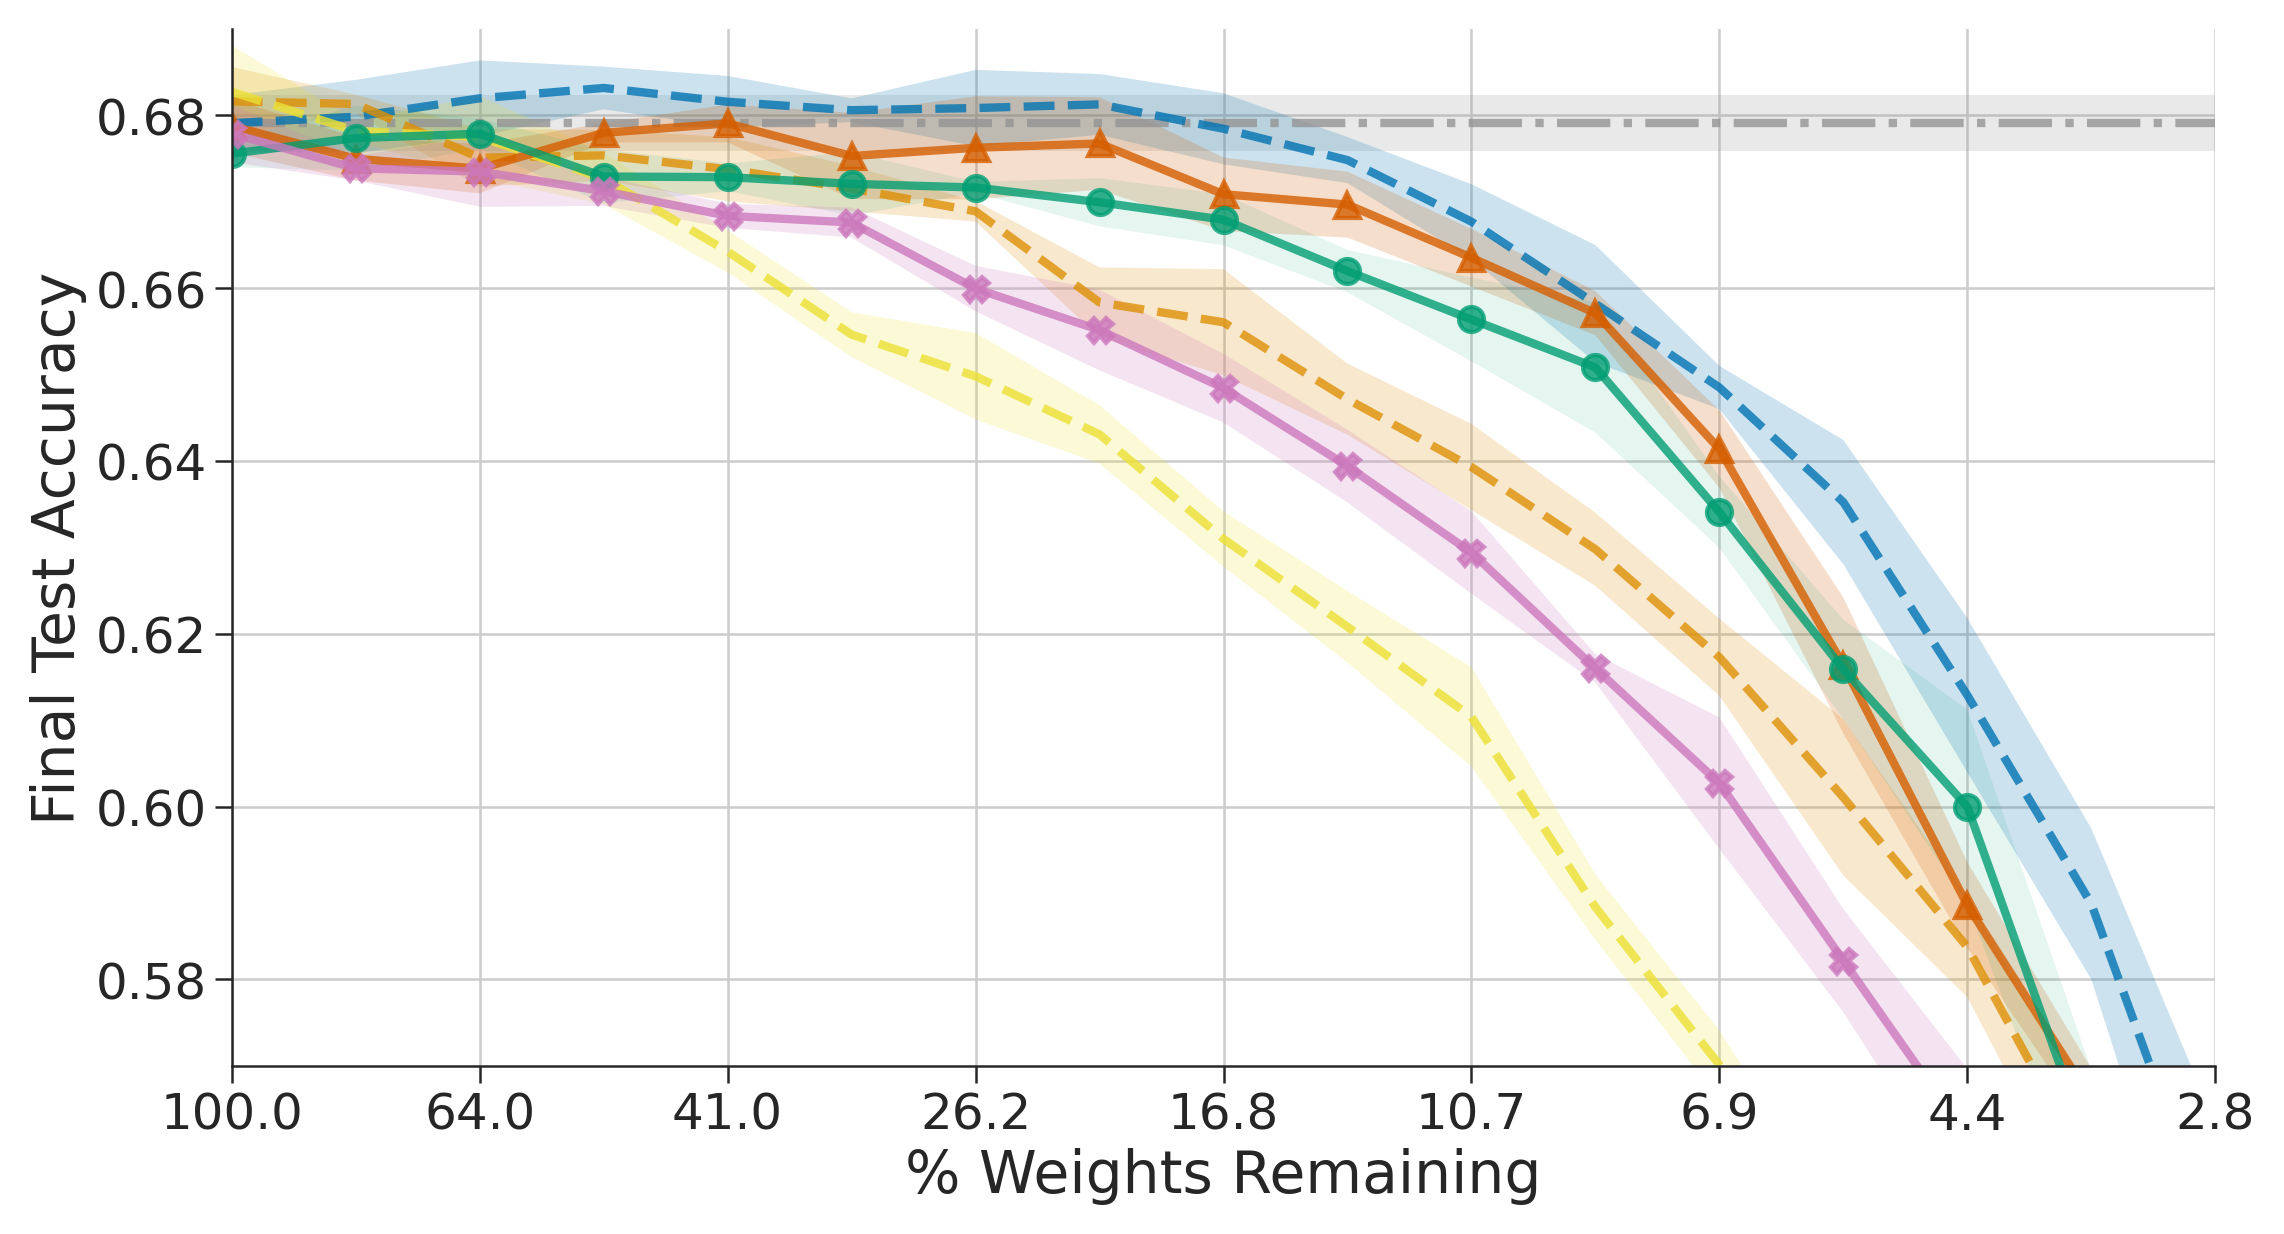

0.6791


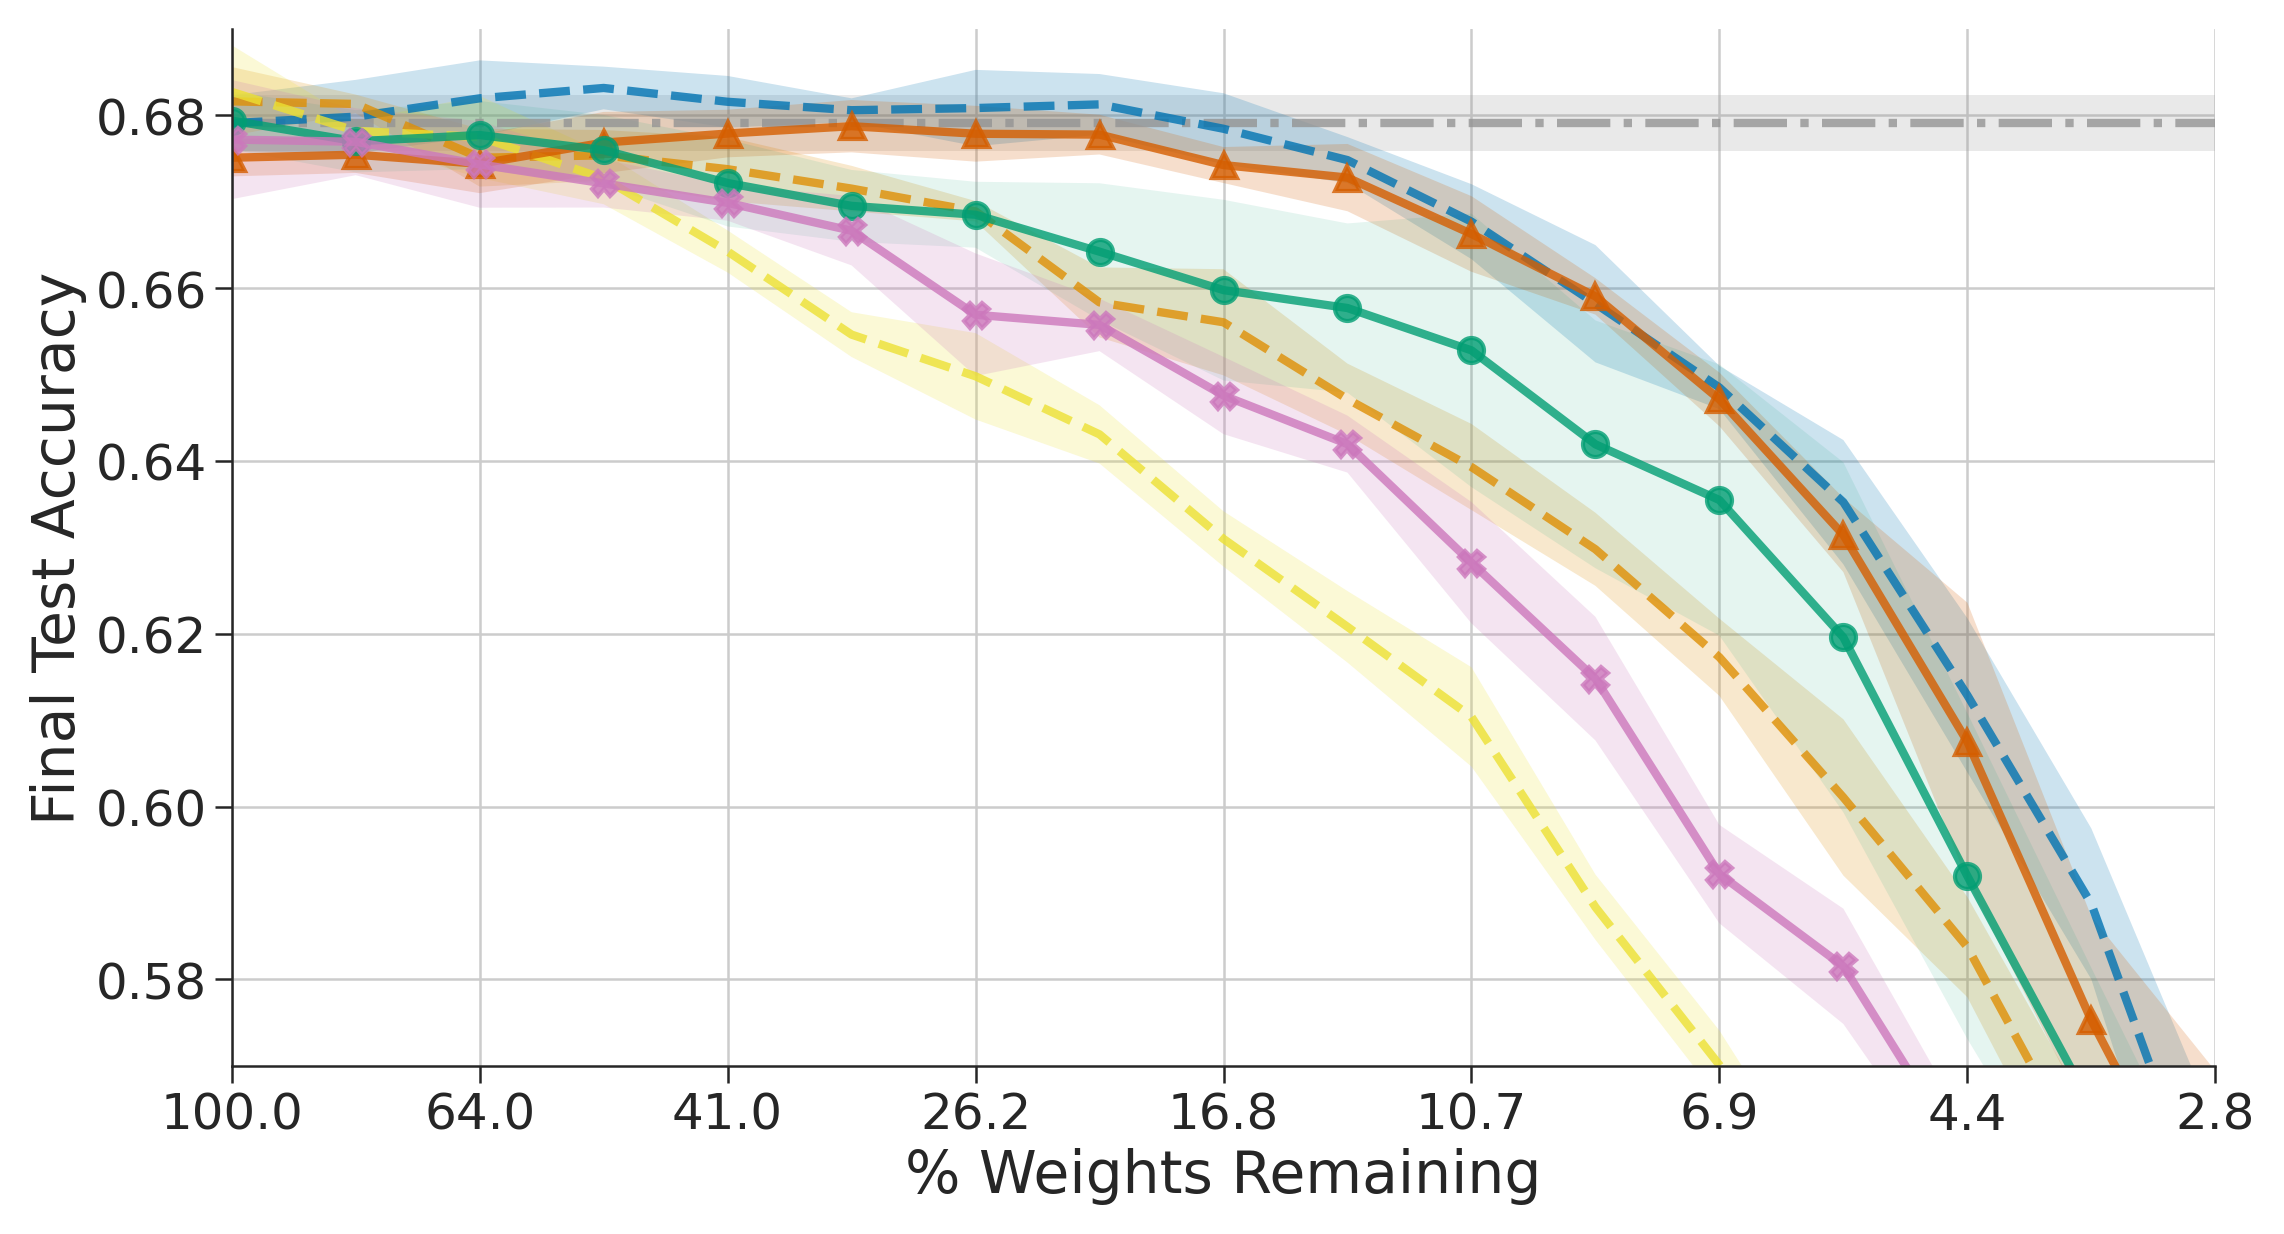

0.6791


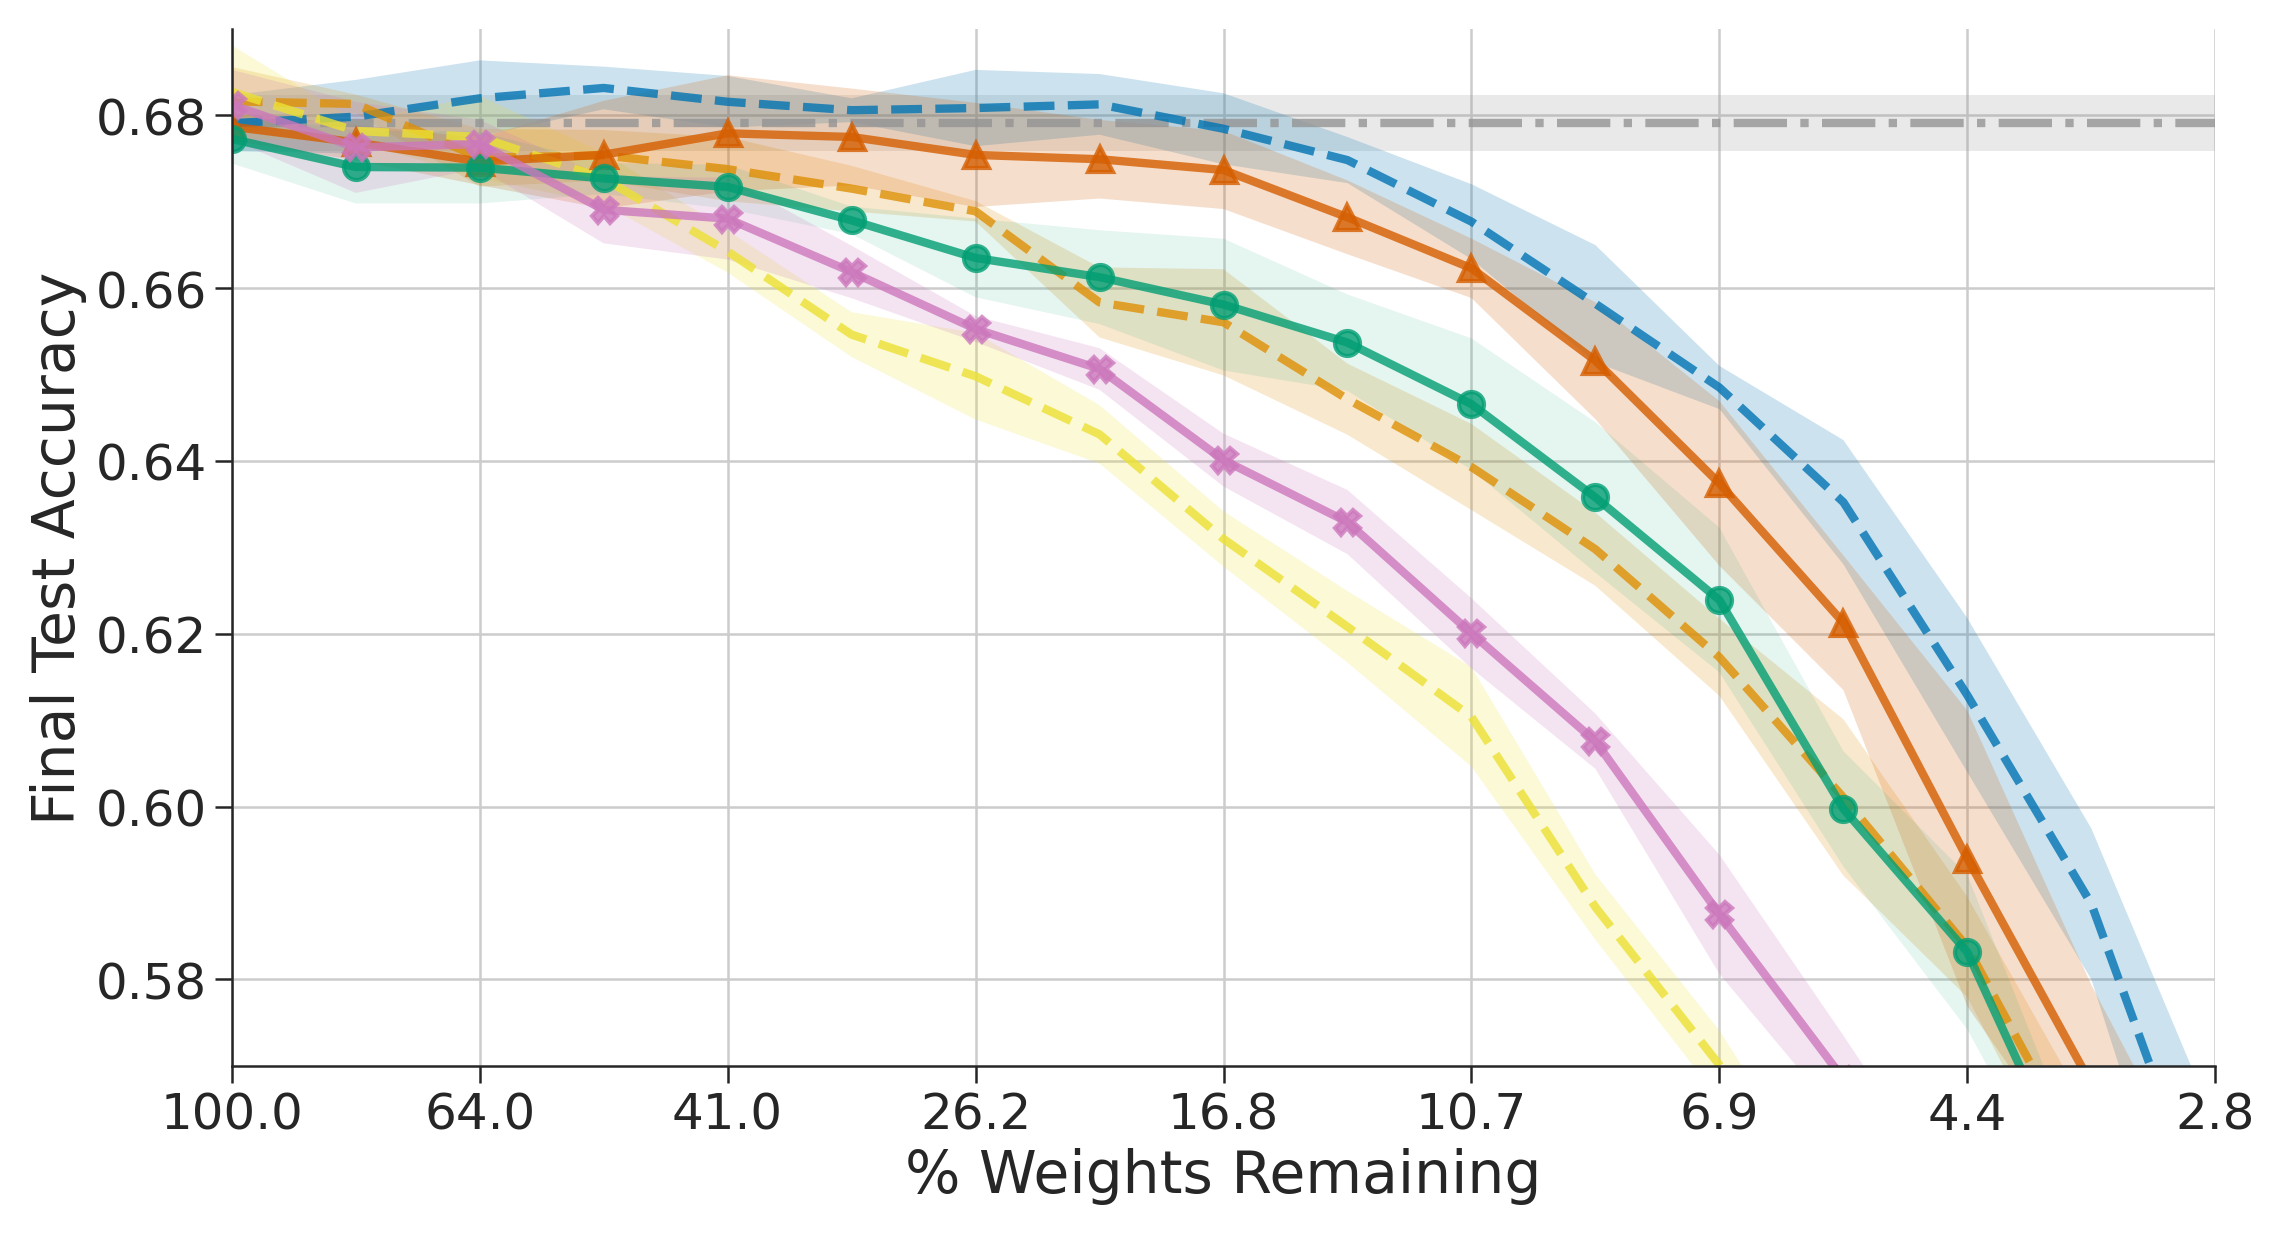

0.6791


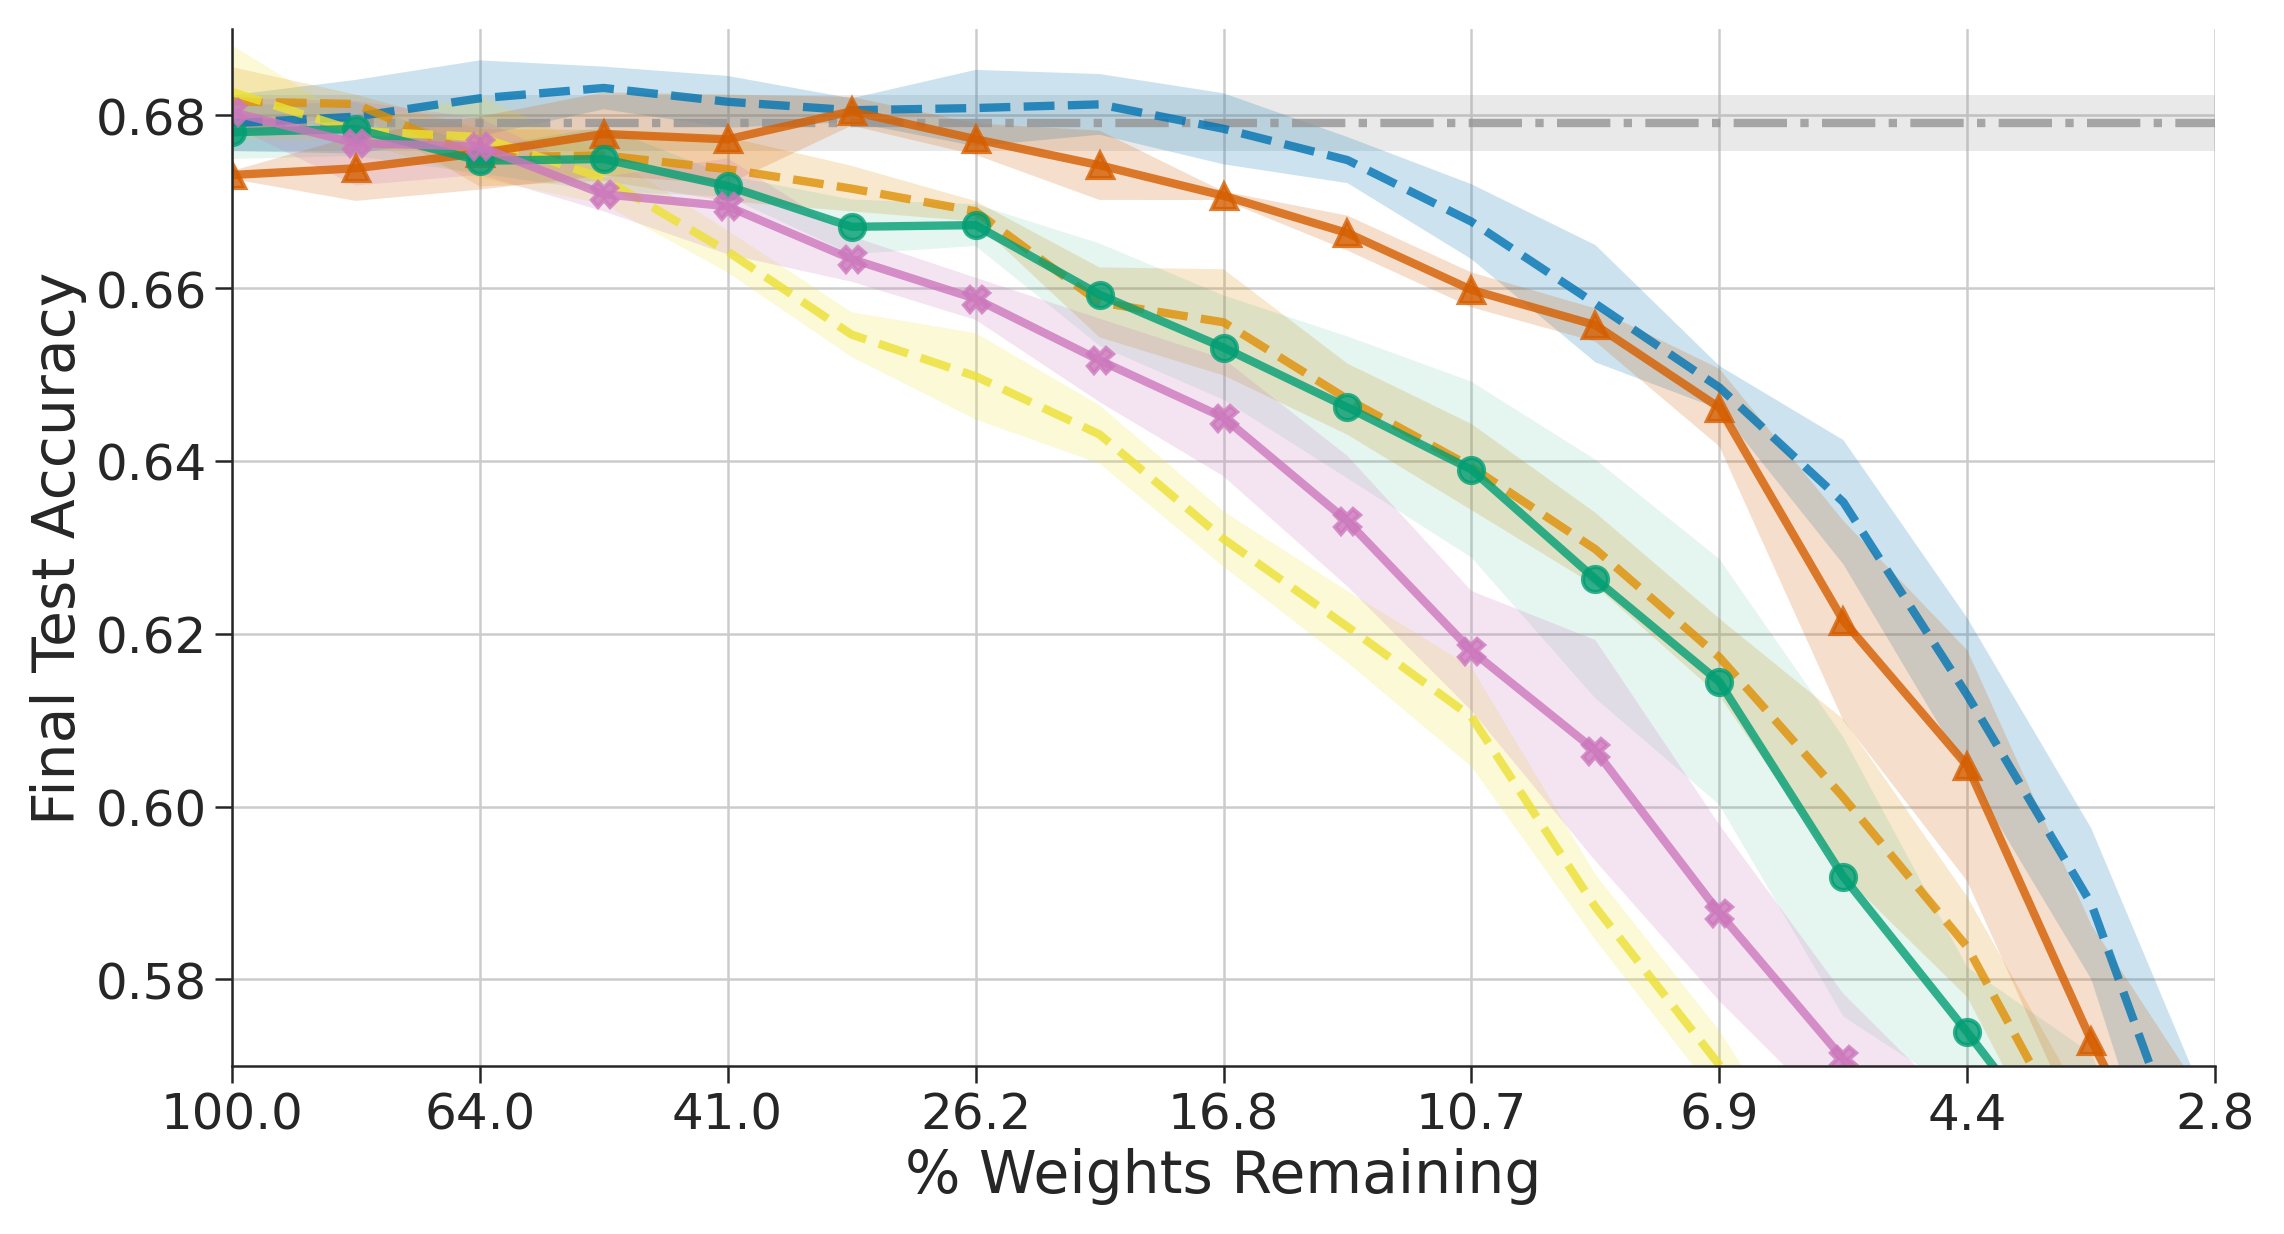

In [7]:

for i in range(len(subset_sizes)):
    plt.figure(figsize=(7.5, 4))
    ls = []

    # Plot accuracy at level 0
    x = [0, 20]
    ys = accs_all[2, :, 0]
    y_mean, y_std = ys.mean(-1), ys.std(-1)
    print(y_mean)
    c='C7'
    l = plt.axhline(y_mean, c=c, ls='-.', alpha=0.8, linewidth=2)
    plt.fill_between(x, [y_mean + y_std]*2, [y_mean - y_std]*2, color=c, alpha=0.2)
    # ls.append(l)

    # Baseline 400
    x = np.arange(21)
    ys = accs_all[2, :, :]
    y_mean, y_std = ys.mean(0), ys.std(0)
    c = f'C0'
    l = plt.plot(x, y_mean, c=c, ls='--', alpha=0.8, linewidth=2)
    ls.append(l[0])
    plt.fill_between(x, y_mean + y_std, y_mean - y_std, color=c, alpha=0.2)

    # Baseline 200
    x = np.arange(21)
    ys = accs_all[1, :, :]
    y_mean, y_std = ys.mean(0), ys.std(0)
    c = f'C1'
    l = plt.plot(x, y_mean, c=c, ls='--', alpha=0.8, linewidth=2)
    ls.append(l[0])
    plt.fill_between(x, y_mean + y_std, y_mean - y_std, color=c, alpha=0.2)

    # Baseline 0
    x = np.arange(21)
    ys = accs_all[0, :, :]
    y_mean, y_std = ys.mean(0), ys.std(0)
    c = f'C8'
    l = plt.plot(x, y_mean, c=c, ls='--', alpha=0.8, linewidth=2)
    ls.append(l[0])
    plt.fill_between(x, y_mean + y_std, y_mean - y_std, color=c, alpha=0.2)

    # Easy data
    x = np.arange(21)
    ys = accs_easy[i, :, :]
    y_mean, y_std = ys.mean(0), ys.std(0)
    c = f'C3'
    l = plt.plot(x, y_mean, c=c, marker='^', alpha=0.8, linewidth=2)
    ls.append(l[0])
    plt.fill_between(x, y_mean + y_std, y_mean - y_std, color=c, alpha=0.2)

    # Random data
    x = np.arange(21)
    ys = accs_rand[i, :, :]
    y_mean, y_std = ys.mean(0), ys.std(0)
    c = f'C2'
    l = plt.plot(x, y_mean, c=c, marker='o', alpha=0.8, linewidth=2)
    ls.append(l[0])
    plt.fill_between(x, y_mean + y_std, y_mean - y_std, color=c, alpha=0.1)

    # Hard data
    x = np.arange(21)
    ys = accs_hard[i, :, :]
    y_mean, y_std = ys.mean(0), ys.std(0)
    c = f'C4'
    l = plt.plot(x, y_mean, c=c, alpha=0.8, linewidth=2, marker='X')
    ls.append(l[0])
    plt.fill_between(x, y_mean + y_std, y_mean - y_std, color=c, alpha=0.2)

    plt.xlim(0, 16)
    plt.ylim(0.57, 0.69)
    plt.xticks(np.arange(0, 17, 2), [f'{f*100:.1f}' for f in 0.8**np.arange(0, 17, 2)])
    plt.xlabel('% Weights Remaining')
    plt.ylabel('Final Test Accuracy')
    # plt.title('CIFAR100 ResNet32')
    sns.despine()
  
    plt.savefig(f'/home/brettlarsen/lth_diet/ipynbs/figs/cifar100_size_{subset_sizes[i]}.svg', bbox_inches='tight')
    plt.show()

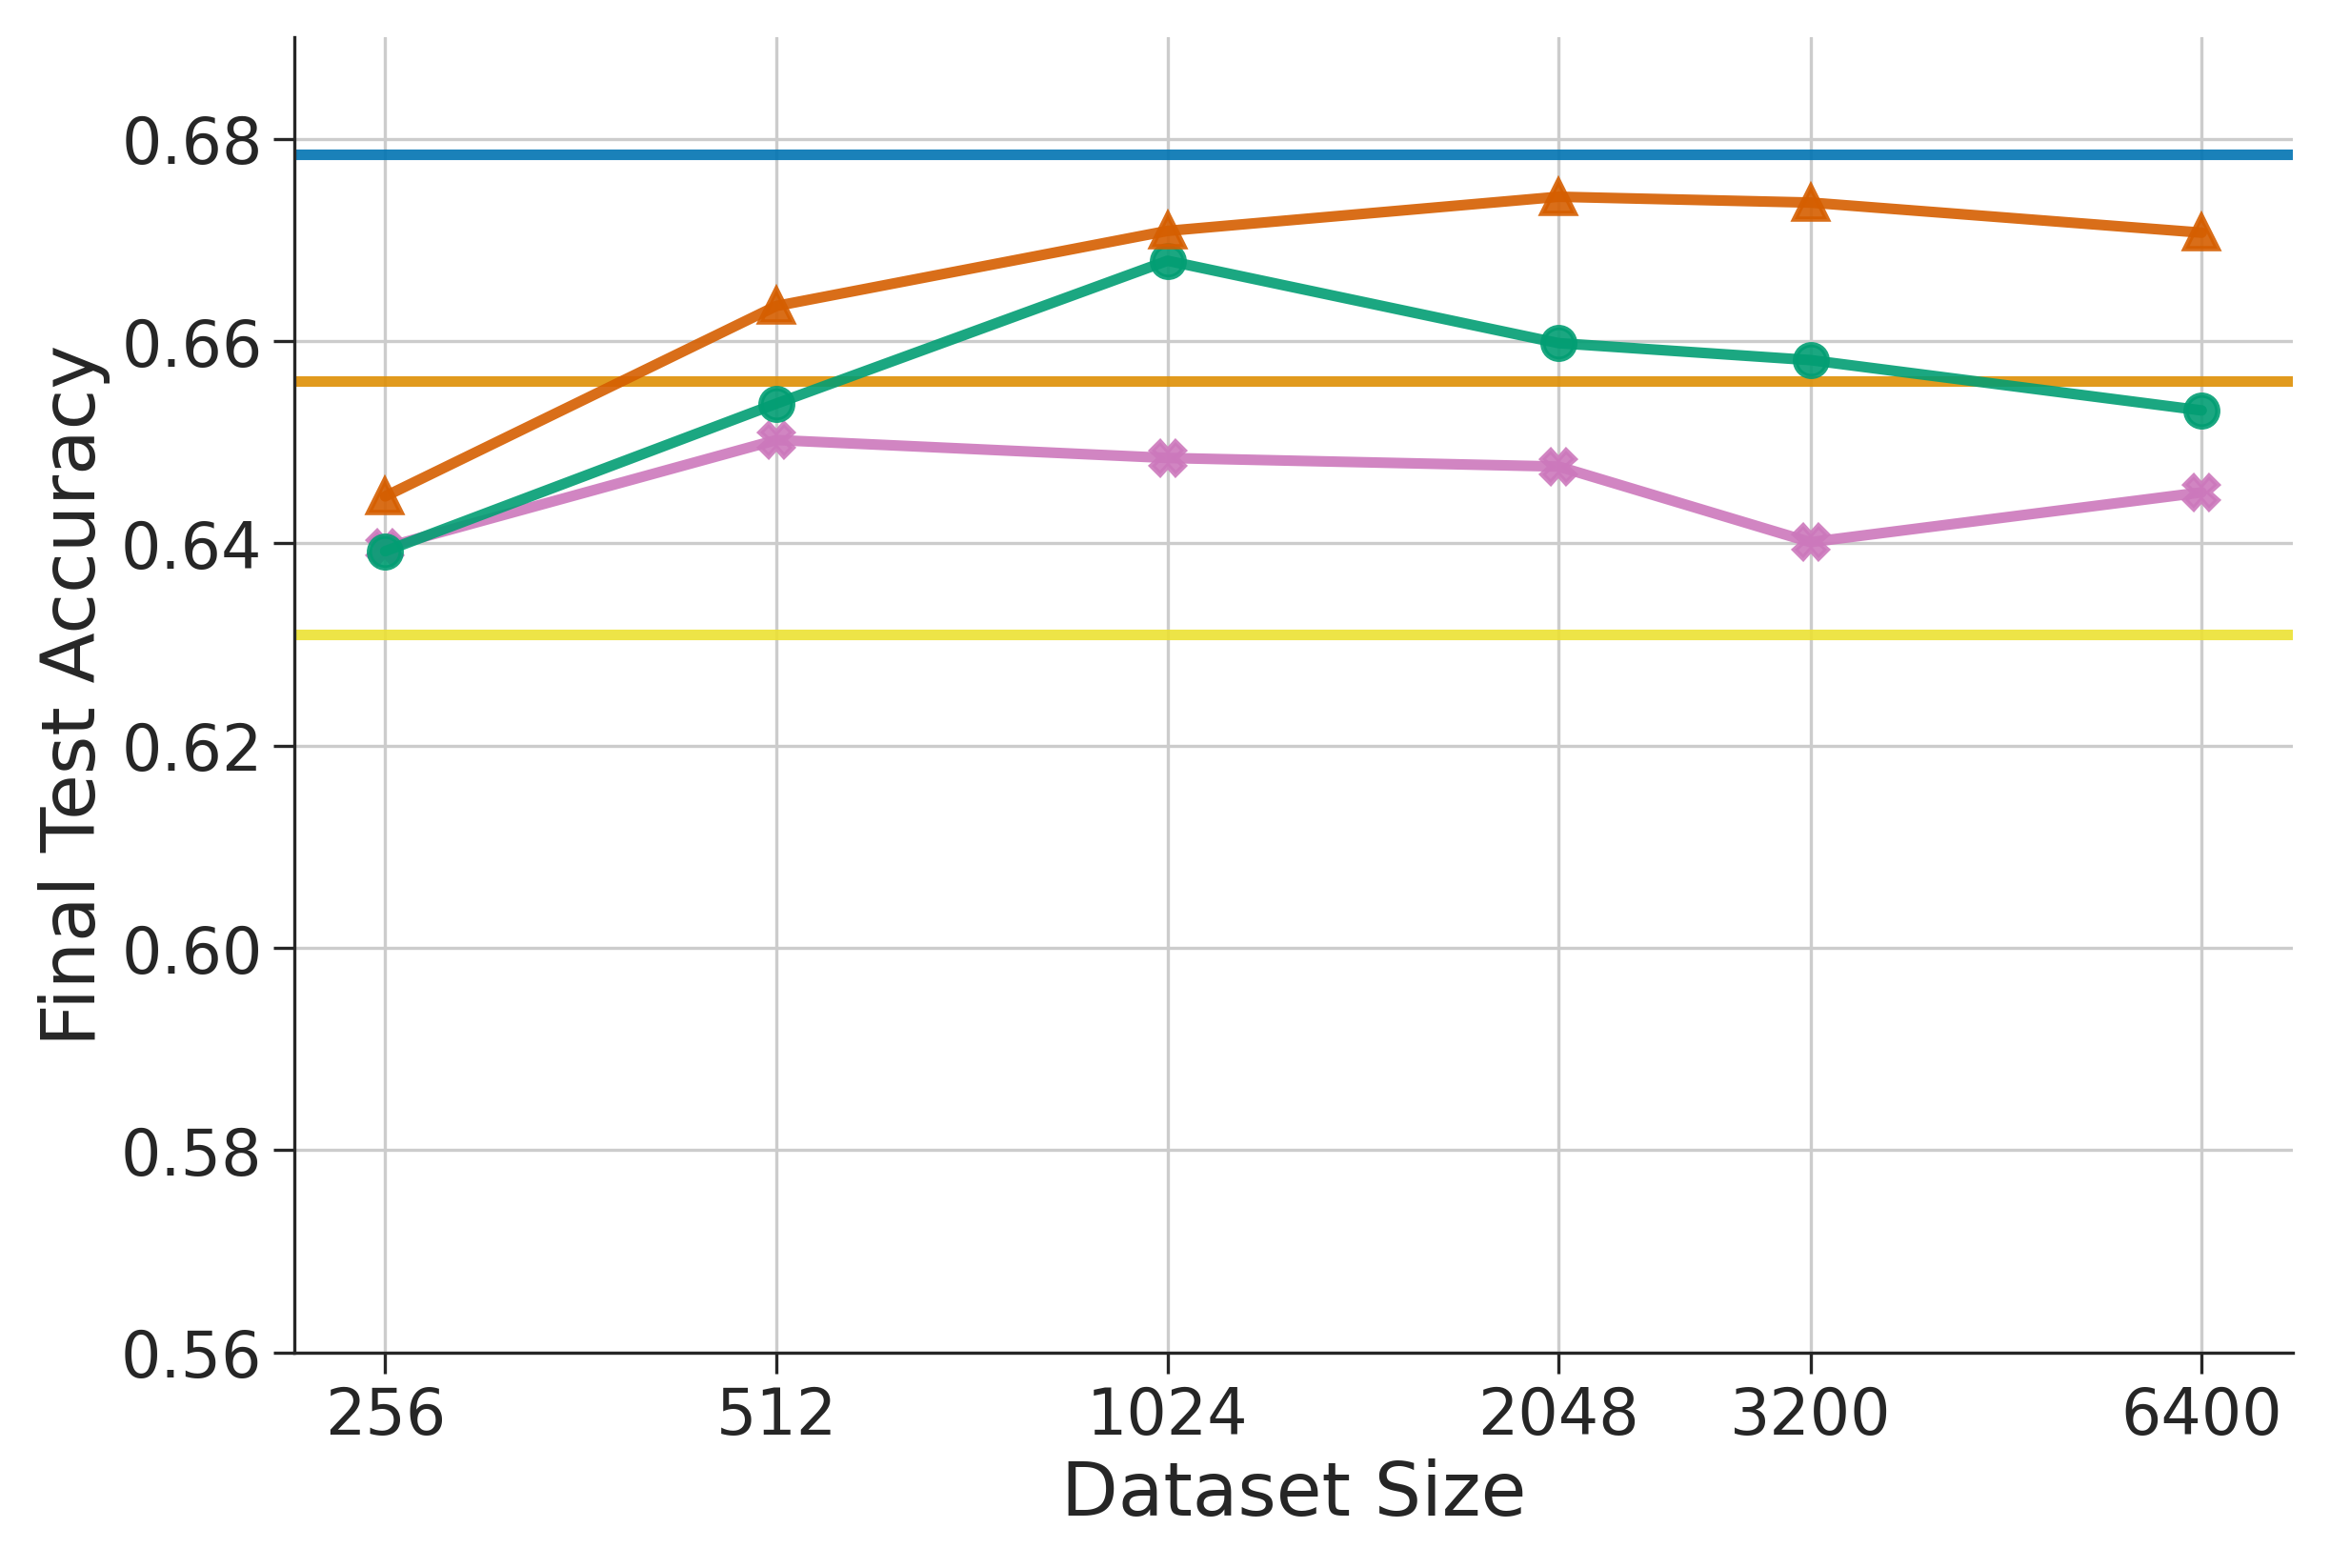

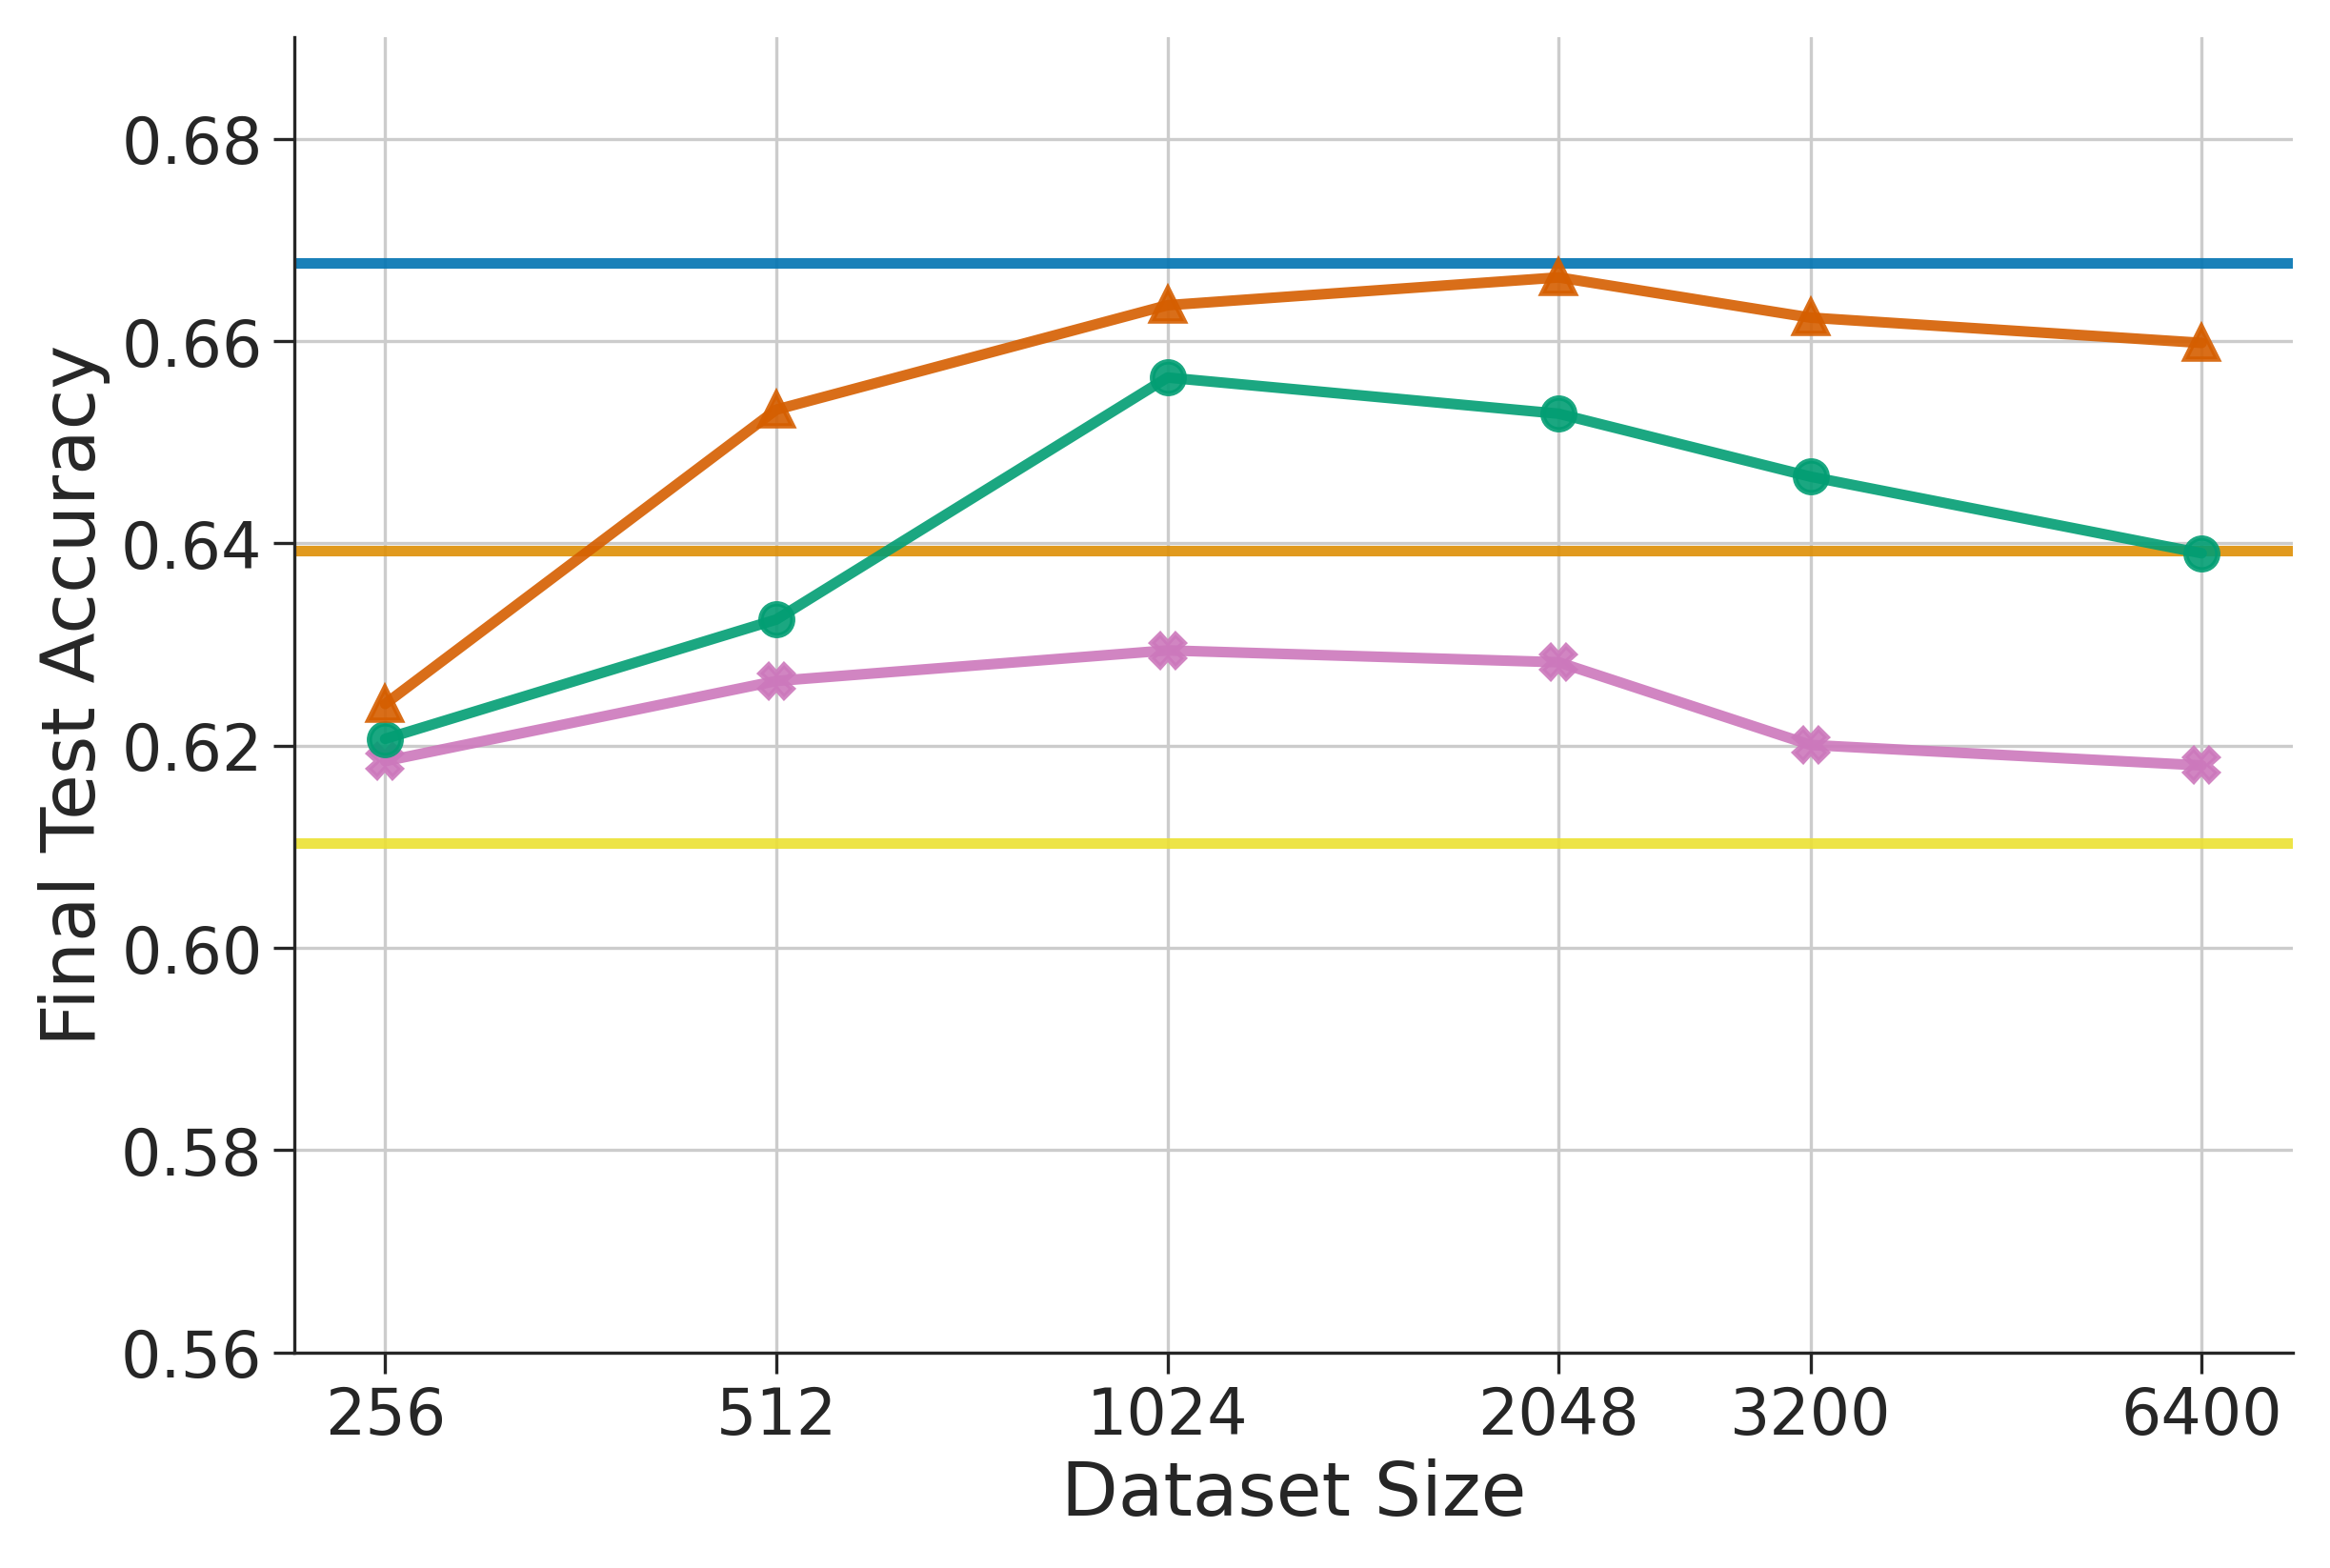

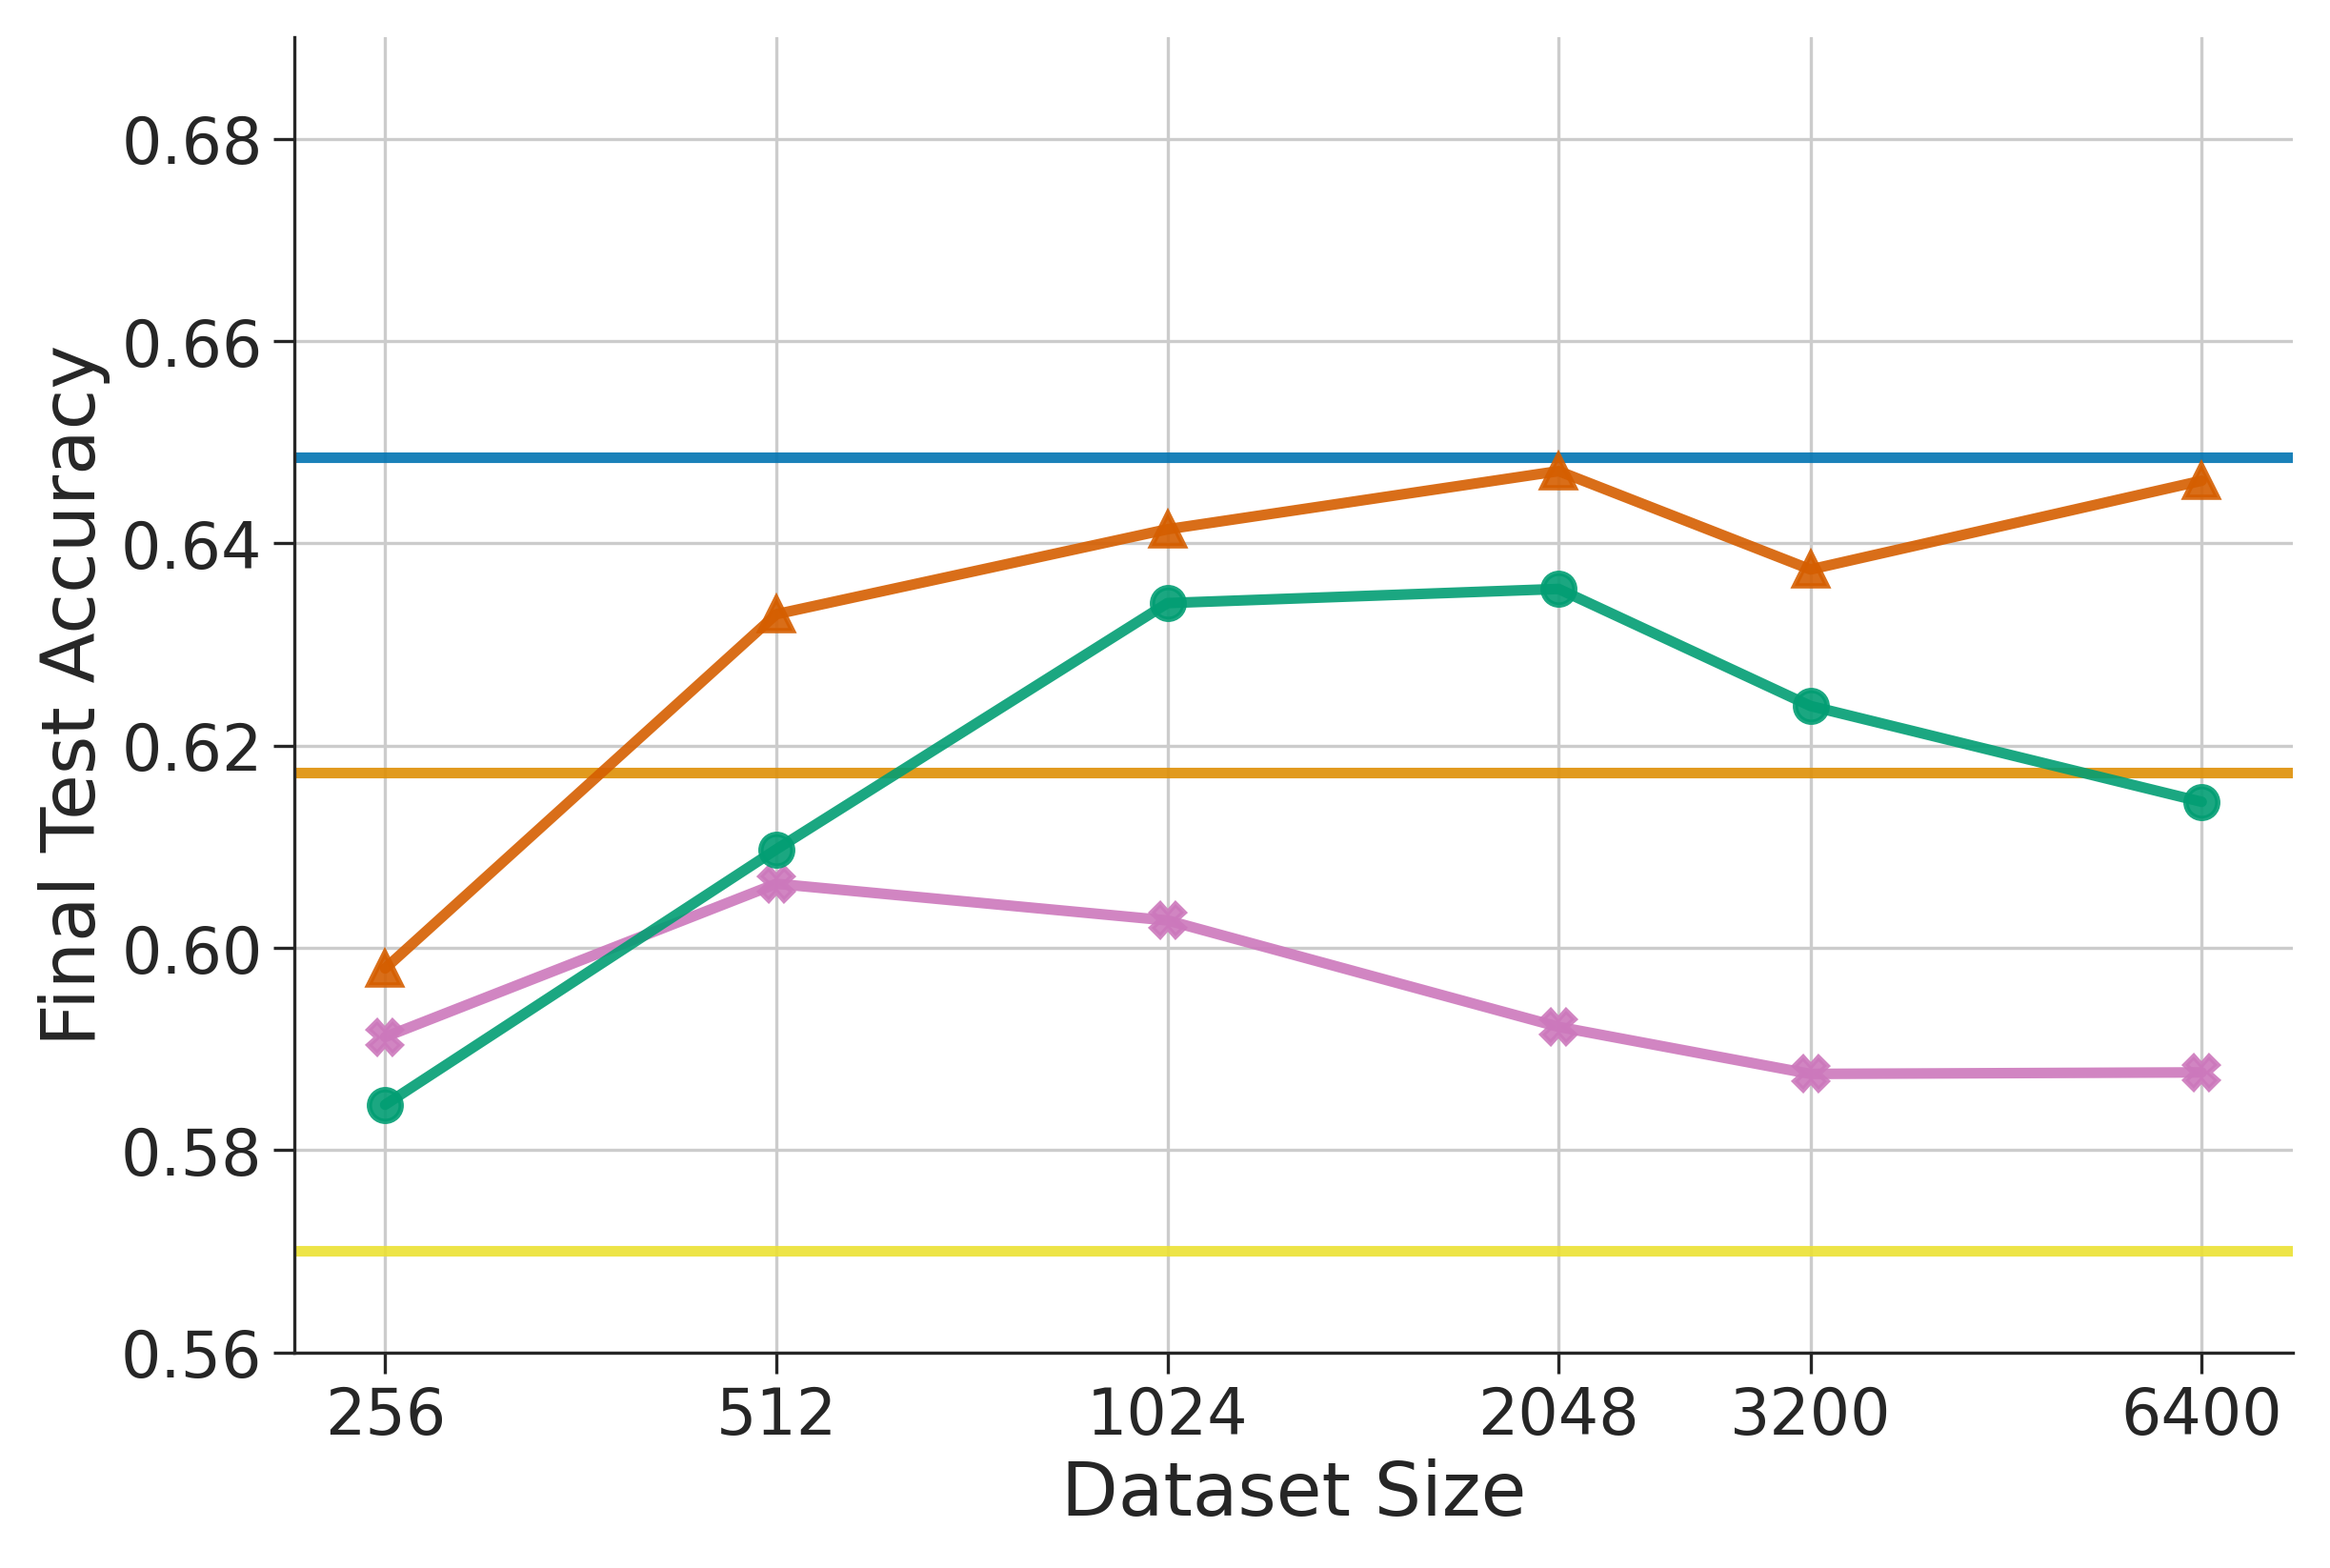

In [14]:
for end in [8, 10, 12]: 
    plt.figure(figsize=(6, 4), dpi=200)
    x = [256, 512, 1024, 2048, 3200, 6400]
    y_hard = [accs_hard[x_, :, end].mean() for x_ in range(len(x))]
    y_rand = [accs_rand[x_, :, end].mean() for x_ in range(len(x))]
    y_easy = [accs_easy[x_, :, end].mean() for x_ in range(len(x))]
    plt.axhline(accs_all[2, :, end].mean(), c='C0', linewidth=2, alpha=0.9)
    plt.axhline(accs_all[1, :, end].mean(), c='C1', linewidth=2, alpha=0.9)
    plt.axhline(accs_all[0, :, end].mean(), c='C8', linewidth=2, alpha=0.9)
    plt.plot(np.log2(x), y_hard, marker='X', c='C4', linewidth=2, alpha=0.9)
    plt.plot(np.log2(x), y_rand, marker='o', c='C2', linewidth=2, alpha=0.9)
    plt.plot(np.log2(x), y_easy, marker='^', c='C3', linewidth=2, alpha=0.9)
    plt.xticks(np.log2(np.array(x)), labels=x)
    plt.xlabel('Dataset Size')
    plt.ylabel('Final Test Accuracy')
    plt.ylim(0.56, 0.69)
    sns.despine()
    plt.savefig(f'/home/brettlarsen/lth_diet/ipynbs/figs/cifar100_level_{end}.svg', bbox_inches='tight')
    plt.show()